In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('./for_abc.csv')
df.head()

,StockCode,Description,quantity,revenue
0,10080,check,22,0.00
1,10080,GROOVY CACTUS INFLATABLE,121,47.19
2,10120,DOGGY RUBBER,72,15.12
3,10124A,SPOTS ON RED BOOKCOVER TAPE,4,1.68
4,10124G,ARMY CAMO BOOKCOVER TAPE,8,3.36


In [3]:
!pip install inventorize3

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for inventorize3: filename=inventorize3-0.0.1-py3-none-any.whl size=15603 sha256=5246cbbc47f6e2c4e8d76f805cd0d9ec3b1fc254be15ccbe1e9d6b512d1a513d
  Stored in directory: c:\users\ps001028870\appdata\local\pip\cache\wheels\e1\00\fb\79525437fa9f8fed4389d8d33c4d133fdfdde66a497ab2e6d4
Successfully built inventorize3


In [4]:
import inventorize3

In [7]:
a=inventorize3.ABC(df[['Description','quantity']])

In [9]:
b=inventorize3.ABC(df[['Description','revenue']])

In [10]:
a

,Description,quantity,Percentage,comulative,Category
962,POPCORN HOLDER,27526,1.338272e-02,0.013383,A
1784,RABBIT NIGHT LIGHT,25694,1.249203e-02,0.025875,A
2726,WORLD WAR 2 GLIDERS ASSTD DESIGNS,17045,8.287020e-03,0.034162,A
3036,JUMBO BAG RED RETROSPOT,15812,7.687554e-03,0.041849,A
862,PAPER CHAIN KIT 50'S CHRISTMAS,15179,7.379799e-03,0.049229,A
...,...,...,...,...,...
1035,HANGING METAL CHICKEN DECORATION,1,4.861848e-07,0.999998,C
2372,SET 10 CARDS CHRISTMAS BAUBLE 16954,1,4.861848e-07,0.999999,C
3402,GREY ACRYLIC FACETED BANGLE,1,4.861848e-07,0.999999,C
2382,FLOWER SHOP DESIGN MUG,1,4.861848e-07,1.000000,C


In [11]:
b

,Description,revenue,Percentage,comulative,Category
3436,DOTCOM POSTAGE,85834.48,0.021789,0.021789,A
1784,RABBIT NIGHT LIGHT,56894.39,0.014442,0.036231,A
862,PAPER CHAIN KIT 50'S CHRISTMAS,50907.49,0.012923,0.049154,A
1152,REGENCY CAKESTAND 3 TIER,40183.50,0.010200,0.059354,A
3036,JUMBO BAG RED RETROSPOT,31101.76,0.007895,0.067249,A
...,...,...,...,...,...
1466,check,0.00,0.000000,1.000000,C
1467,found,0.00,0.000000,1.000000,C
2490,check,0.00,0.000000,1.000000,C
2763,adjustment,0.00,0.000000,1.000000,C


In [12]:
a['Category'].value_counts()

Category
C    1924
A     772
B     747
Name: count, dtype: int64

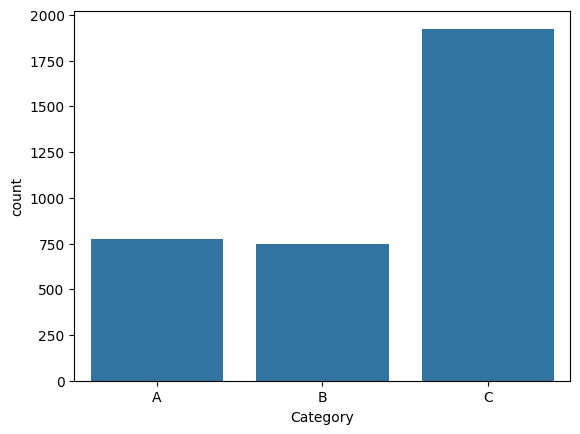

In [16]:
sns.countplot(data=a,x='Category')
plt.show()

In [14]:

b['Category'].value_counts()

Category
C    1949
B     804
A     690
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

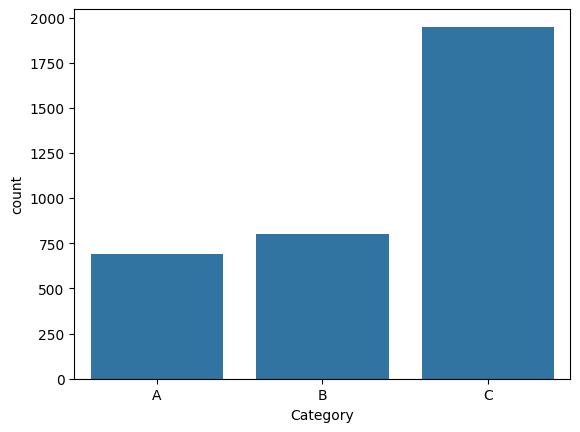

In [15]:
sns.countplot(data=b,x='Category')

In [17]:
# multi

In [19]:
multi_abc= inventorize3.productmix(df['Description'],df['quantity'],df['revenue'])

In [20]:
multi_abc.columns

Index(['skus', 'sales', 'revenue', 'sales_mix', 'comulative_sales',
       'revenue_mix', 'comulative_revenue', 'sales_category',
       'revenue_category', 'product_mix'],
      dtype='object')

In [22]:
multi_abc.product_mix.value_counts()

product_mix
C_C    1661
A_A     496
B_B     343
B_C     237
C_B     236
A_B     225
B_A     167
A_C      51
C_A      27
Name: count, dtype: int64

In [23]:
multi_abc

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
3436,DOTCOM POSTAGE,138,85834.48,6.709350e-05,0.970466,0.021789,0.021789,C,A,C_A
1784,RABBIT NIGHT LIGHT,25694,56894.39,1.249203e-02,0.025875,0.014442,0.036231,A,A,A_A
862,PAPER CHAIN KIT 50'S CHRISTMAS,15179,50907.49,7.379799e-03,0.049229,0.012923,0.049154,A,A,A_A
1152,REGENCY CAKESTAND 3 TIER,3161,40183.50,1.536830e-03,0.331125,0.010200,0.059354,A,A,A_A
3036,JUMBO BAG RED RETROSPOT,15812,31101.76,7.687554e-03,0.041849,0.007895,0.067249,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...
1783,for online retail orders,1,0.00,4.861848e-07,0.999984,0.000000,1.000000,C,C,C_C
221,Amazon Adjustment,1,0.00,4.861848e-07,0.999989,0.000000,1.000000,C,C,C_C
2408,Found by jackie,1,0.00,4.861848e-07,0.999975,0.000000,1.000000,C,C,C_C
718,Amazon,1,0.00,4.861848e-07,0.999975,0.000000,1.000000,C,C,C_C


<Axes: xlabel='product_mix', ylabel='count'>

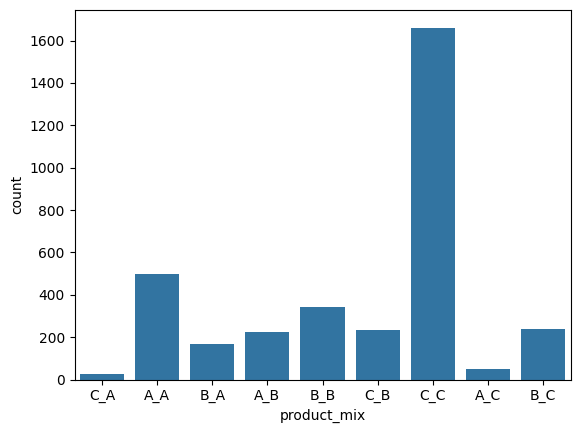

In [24]:
sns.countplot(data=multi_abc,x='product_mix')

<Axes: xlabel='product_mix', ylabel='sales'>

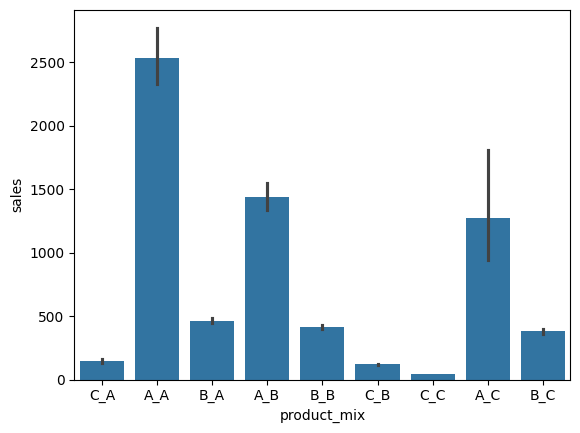

In [27]:
sns.barplot(x='product_mix',y='sales',data=multi_abc)

In [36]:
df=pd.read_csv('./twentyeleven.csv')

In [37]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [38]:
df= df.groupby(['Country','Description']).agg(
    total_sales=('Quantity',np.sum),
    total_revenue=('revenue',np.sum)
).reset_index()

In [39]:
df

,Country,Description,total_sales,total_revenue
0,Australia,10 COLOUR SPACEBOY PEN,48,40.8
1,Australia,12 PENCIL SMALL TUBE WOODLAND,384,211.2
2,Australia,12 PENCILS TALL TUBE POSY,252,79.8
3,Australia,12 PENCILS TALL TUBE RED RETROSPOT,12,10.2
4,Australia,16 PIECE CUTLERY SET PANTRY DESIGN,24,300.0
...,...,...,...,...
19386,Unspecified,WRAP POPPIES DESIGN,25,10.5
19387,Unspecified,WRAP SUKI AND FRIENDS,25,10.5
19388,Unspecified,WRAP VINTAGE PETALS DESIGN,25,10.5
19389,Unspecified,WRAP WEDDING DAY,25,10.5


In [40]:
cat_multi= inventorize3.productmix_storelevel(
    df['Description'],
    df['total_sales'],
    df['total_revenue'],
    df['Country']
).reset_index()

In [41]:
cat_multi.columns

Index(['index', 'sku', 'sales', 'revenue', 'storeofsku', 'sales_mix',
       'comulative_sales', 'revenue_mix', 'comulative_revenue',
       'sales_category', 'revenue_category', 'product_mix'],
      dtype='object')

In [42]:
cat_multi

,index,sku,sales,revenue,storeofsku,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
0,369,RABBIT NIGHT LIGHT,1884,3375.84,Australia,0.022498,0.057749,0.024554,0.024554,A,A,A_A
1,488,SET OF 6 SPICE TINS PANTRY DESIGN,600,2082.00,Australia,0.007165,0.170619,0.015143,0.039697,A,A,A_A
2,401,RED TOADSTOOL LED NIGHT LIGHT,1344,1987.20,Australia,0.016049,0.094146,0.014454,0.054150,A,A,A_A
3,464,SET OF 3 CAKE TINS PANTRY DESIGN,464,1983.20,Australia,0.005541,0.221657,0.014424,0.068575,A,A,A_A
4,403,REGENCY CAKESTAND 3 TIER,180,1978.20,Australia,0.002149,0.682585,0.014388,0.082963,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...,...,...
19386,19156,FUSCHIA FLOWER PURSE WITH BEADS,1,0.83,Unspecified,0.000303,0.981184,0.000175,0.999637,C,C,C_C
19387,19140,ENGLISH ROSE SCENTED HANGING FLOWER,1,0.75,Unspecified,0.000303,0.984219,0.000158,0.999795,C,C,C_C
19388,19207,MAGNETS PACK OF 4 RETRO PHOTO,1,0.39,Unspecified,0.000303,0.978756,0.000082,0.999878,C,C,C_C
19389,19157,FUSCHIA VOILE POINTY SHOE DEC,1,0.39,Unspecified,0.000303,0.980880,0.000082,0.999960,C,C,C_C


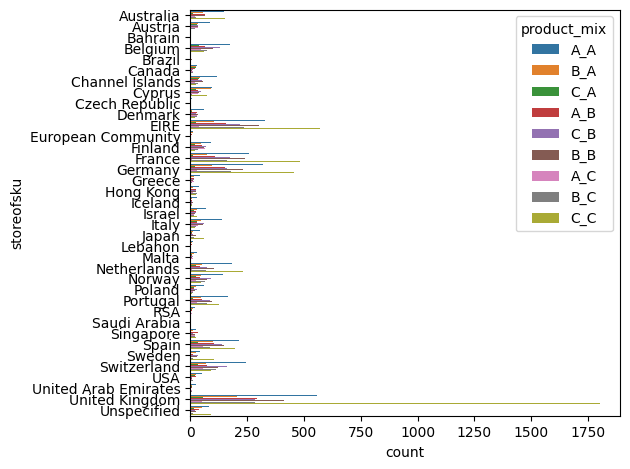

In [48]:
sns.countplot(data=cat_multi,hue='product_mix',y='storeofsku')
plt.tight_layout()
plt.show()